### Step 1: Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import json

import warnings
#warnings.filterwarnings('ignore')

#### 1.1 Loading Data

In [3]:
df = pd.read_csv("SpotifyData/genres_v2.csv", low_memory=False)
df['song_title'] = df['song_name'].combine_first(df['title'])
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title,song_title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle,Euphoric Hardstyle


#### 1.2 Handling Missing Values
#### 1.3 Data Cleaning


In [4]:
columns_to_drop =  ['Unnamed: 0', 'type', 'id', 'uri', 'track_href', 'analysis_url','song_name', 'title','type']
spotify_df = df.drop(columns=columns_to_drop)
spotify_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,song_title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,269208,4,hardstyle,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,210112,4,hardstyle,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,234823,4,hardstyle,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,323200,4,hardstyle,Euphoric Hardstyle


In [ ]:
# Distribution of numeric features
spotify_df.hist(bins=30, figsize=(15, 10))
plt.show()

# Correlation heatmap
#plt.figure(figsize=(12, 8))
#sns.heatmap(spotify_df.corr(), annot=True, cmap='coolwarm')
#plt.show()

## Step 2: Exploratory Data Analysis (EDA)

#### 2.1 Summary and Visualization

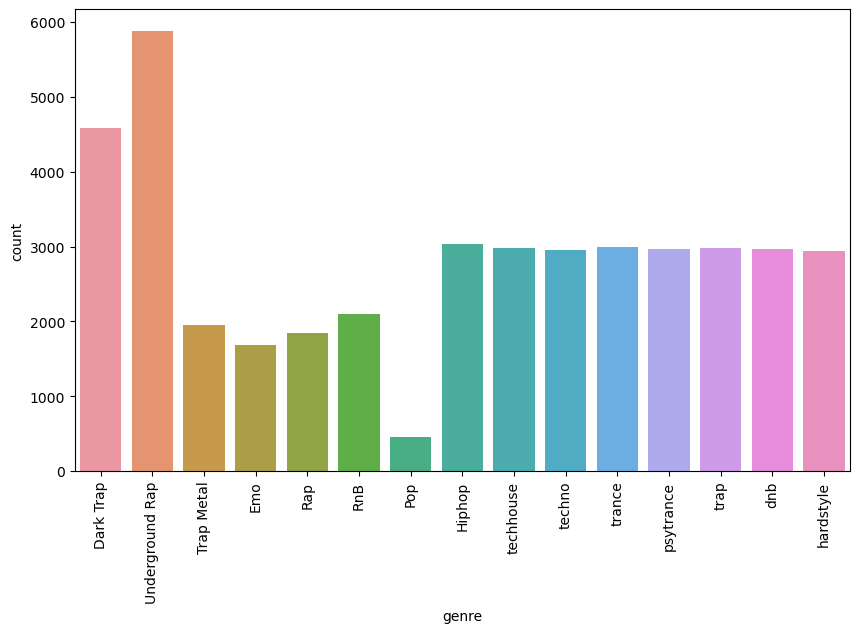

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000


In [9]:



plt.figure(figsize=(10, 6))
sns.countplot(x='genre', data=spotify_df)
plt.xticks(rotation=90)
plt.show()

spotify_df.describe()



In [40]:
spotify_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'genre', 'song_title'],
      dtype='object')

/Users/thirusivarajan/anaconda3/envs/AIA/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


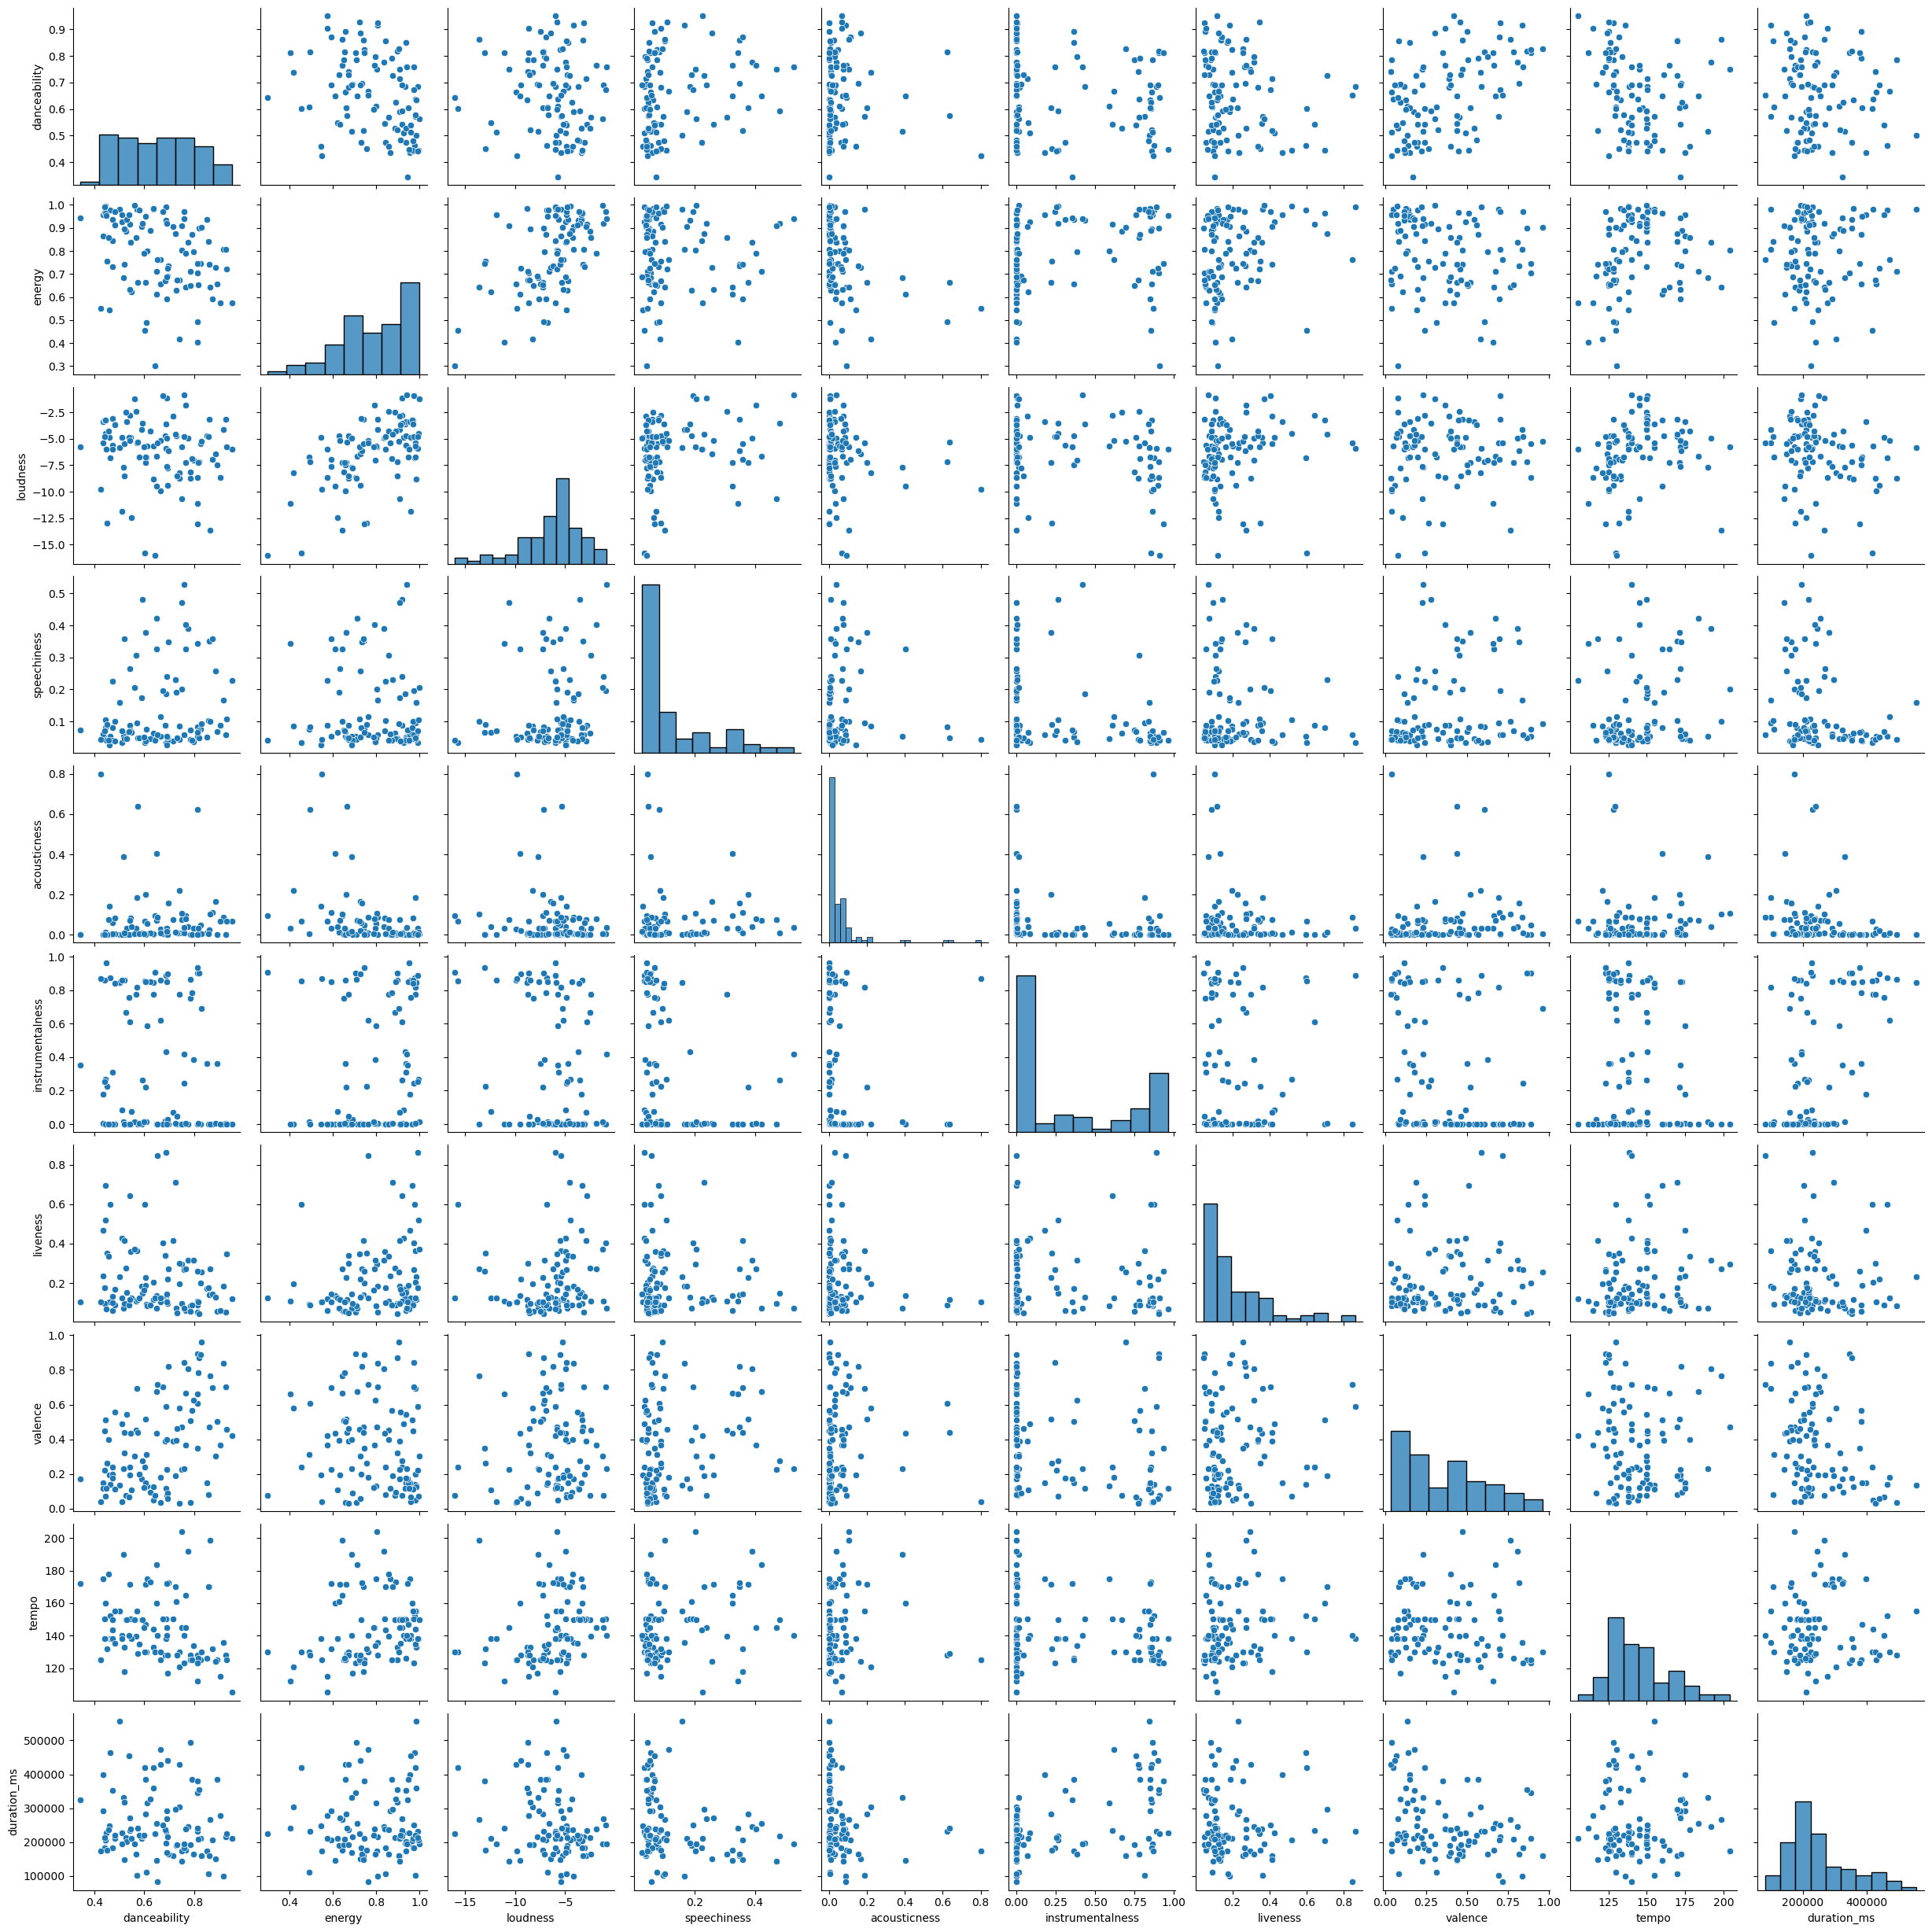

In [10]:
# We sample a small amount because trying to plot all 40000 rows would be way too slow.

numbers = df[['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']]
small_sample = numbers.sample(n=100)
sns.pairplot(small_sample)

## Step 3: Feature Engineering

#### 3.1 Selecting Features

In [11]:

# Select Features and Label
#features = [
#    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
#    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
#    'duration_ms', 'time_signature'
#]
features = [
    'danceability', 'energy',  'loudness',  'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]
X = spotify_df[features]
y = spotify_df['genre']
print(y)

0        Dark Trap
1        Dark Trap
2        Dark Trap
3        Dark Trap
4        Dark Trap
           ...    
42300    hardstyle
42301    hardstyle
42302    hardstyle
42303    hardstyle
42304    hardstyle
Name: genre, Length: 42305, dtype: object


#### 3.2 Encoding Categorical Variables

In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

spotify_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,song_title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap,Venom


#### 3.3 Scaling Features

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8
0,0.829884,0.813955,0.712039,0.430304,0.060525,0.013549,0.045943,0.382028,0.610006
1,0.708527,0.492877,0.715710,0.061410,0.405870,0.000000,0.109792,0.108635,0.351848
2,0.850471,0.892974,0.782742,0.042890,0.013967,0.000004,0.369692,0.021046,0.986200
3,0.445227,0.780947,0.784742,0.086971,0.023987,0.000000,0.105699,0.161250,0.794595
4,0.794127,0.623909,0.703712,0.292754,0.219635,0.000000,0.158907,0.590426,0.554579
...,...,...,...,...,...,...,...,...,...
42300,0.501571,0.692925,0.772743,0.008340,0.031882,0.000349,0.112862,0.387187,0.567055
42301,0.489652,0.767944,0.696754,0.027293,0.022772,0.000018,0.198813,0.375838,0.566531
42302,0.320620,0.820956,0.828791,0.030109,0.026315,0.000245,0.382994,0.108635,0.597377
42303,0.446311,0.920981,0.782906,0.017871,0.000557,0.029929,0.047887,0.484164,0.567233


### Step 4: Model Selection

#### 4.1 Splitting the Data

In [13]:
## Model Selection
from sklearn.model_selection import train_test_split

#Split the Data

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train


array([[0.90031423, 0.69092489, 0.7109711 , ..., 0.07940244, 0.66676983,
        0.81265748],
       [0.3975512 , 0.96199076, 0.75395151, ..., 0.63368464, 0.1086351 ,
        0.49310942],
       [0.67277061, 0.69192514, 0.76110122, ..., 0.16197688, 0.65026308,
        0.71347252],
       ...,
       [0.43222451, 0.83796062, 0.72853034, ..., 0.05771002, 0.13649025,
        0.71479704],
       [0.66951999, 0.58990035, 0.77819477, ..., 0.12718715, 0.02207779,
        0.93652163],
       [0.86997508, 0.6539159 , 0.78139981, ..., 0.18039497, 0.28917776,
        0.49317102]])

#### 4.2 Choosing a Model

In [46]:
## Choosing the Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Logistic Regression: 
#model = LogisticRegression()
#model.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier

# Random Forest:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

from sklearn.svm import SVC

# Support Vector Machine:
#model = SVC(kernel='linear')
#model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.50      0.43      0.46       970
           1       0.69      0.71      0.70       341
           2       0.38      0.29      0.33       621
           3       0.26      0.09      0.14        98
           4       0.47      0.32      0.38       341
           5       0.37      0.32      0.34       396
           6       0.29      0.20      0.24       384
           7       0.37      0.52      0.43      1192
           8       0.96      0.97      0.96       599
           9       0.88      0.94      0.91       619
          10       0.88      0.89      0.88       598
          11       0.86      0.91      0.89       568
          12       0.85      0.81      0.83       590
          13       0.81      0.90      0.85       562
          14       0.85      0.85      0.85       582

    accuracy                           0.65      8461
   macro avg       0.63      0.61      0.61      8461
weighted avg       0.64   

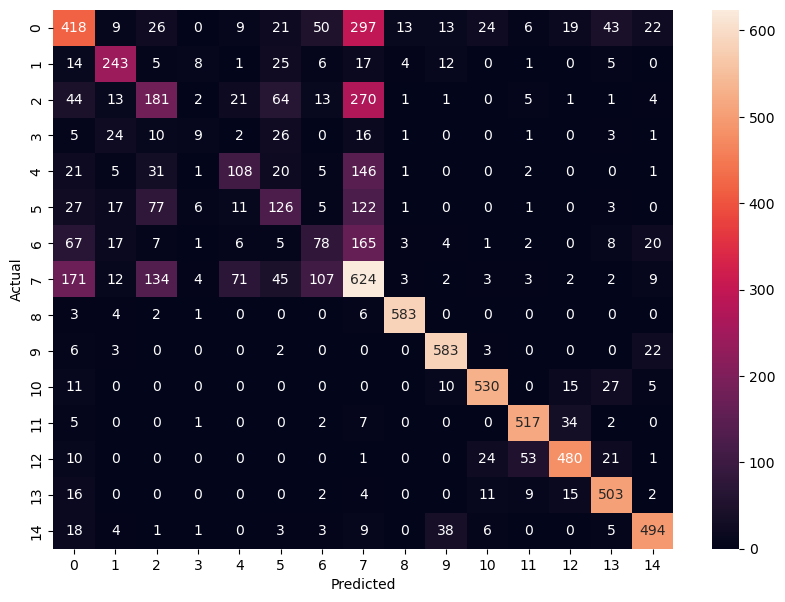

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
# how to read this heatmap: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
